In [4]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import torchvision
from sklearn.model_selection import train_test_split

resize = torchvision.transforms.Resize(size=(256))

In [2]:
%reset -f

In [5]:
dicoms_corrected_70 = np.load('ICRU_pepvc_corr_VMIs_70.npy')

dicoms_corrected_40 = np.load('ICRU_pepvc_corr_VMIs_40.npy')



In [6]:
dicoms_corrected = np.stack([dicoms_corrected_70, dicoms_corrected_40], axis=1)
del dicoms_corrected_40, dicoms_corrected_70
dicoms_tensor = torch.from_numpy(dicoms_corrected)
del dicoms_corrected

In [7]:
SPR_array = np.load('ICRU_pepvc_corr_SPR_maps.npy')

SPR_array = np.expand_dims(SPR_array, 1)

SPR_tensor = torch.from_numpy(SPR_array)

del SPR_array

dicoms_tensor = resize(dicoms_tensor)
SPR_tensor = resize(SPR_tensor)

dicoms_tensor = dicoms_tensor.numpy()
SPR_tensor = SPR_tensor.numpy()

In [8]:
VMI_train, VMI_test, SPR_train, SPR_test = train_test_split(dicoms_tensor, SPR_tensor, test_size=0.20, random_state=42)

In [9]:
VMI_train, VMI_val, SPR_train, SPR_val = train_test_split(VMI_train, SPR_train, test_size=0.20, random_state=42)

In [12]:
print(np.shape(SPR_test))

(338, 1, 256, 256)


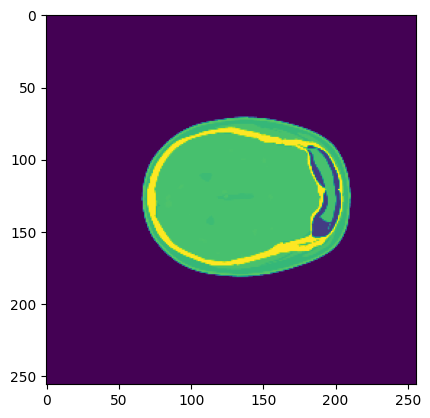

In [15]:
plt.imshow(SPR_train[140,0,:,:])
plt.show()

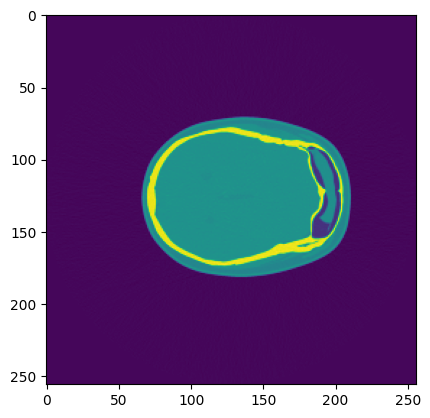

In [16]:
plt.imshow(VMI_train[140,0,:,:])
plt.show()

In [17]:
training_set = np.concatenate((VMI_train, SPR_train), axis=1)
training_set = torch.from_numpy(training_set)
print(training_set.size())

torch.Size([1078, 3, 256, 256])


In [18]:
validation_set = np.concatenate((VMI_val, SPR_val), axis=1)
validation_set = torch.from_numpy(validation_set)
print(validation_set.size())

torch.Size([270, 3, 256, 256])


In [19]:
evaluation_set = np.concatenate((VMI_test, SPR_test), axis=1)
evaluation_set = torch.from_numpy(evaluation_set)
print(evaluation_set.size())

torch.Size([338, 3, 256, 256])


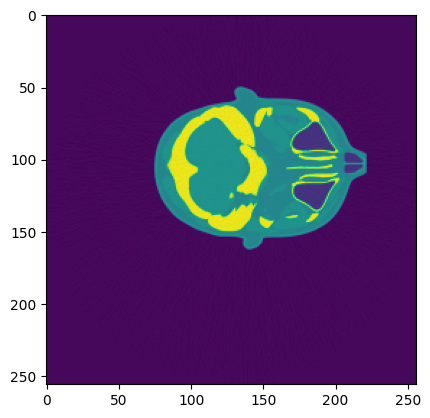

In [22]:
slice = 18
plt.imshow(evaluation_set[slice,0,:,:])
plt.show()

In [16]:
print(training_set[slice,2,100,100])

tensor(1.0364)


<function matplotlib.pyplot.show(close=None, block=None)>

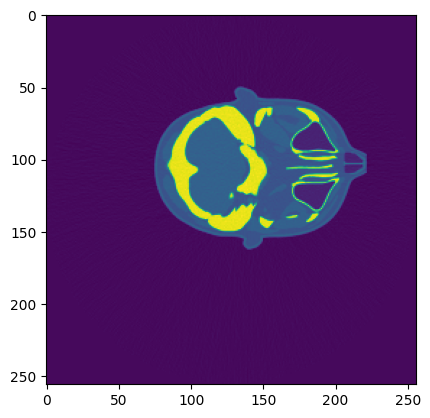

In [23]:
plt.imshow(evaluation_set[slice, 1, :, :])
plt.show

In [24]:
torch.save(training_set, 'train_ICRU_pepvc_corr.pt')
torch.save(validation_set, 'val_ICRU_pepvc_corr.pt')
torch.save(evaluation_set, 'test_ICRU_pepvc_corr.pt')